<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curve-fits-for-the-collisional-rates-in-Argon" data-toc-modified-id="Curve-fits-for-the-collisional-rates-in-Argon-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curve fits for the collisional rates in Argon</a></span><ul class="toc-item"><li><span><a href="#Electron-collisions" data-toc-modified-id="Electron-collisions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Electron collisions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-momentum-transfer-cross-sections" data-toc-modified-id="Plot-the-momentum-transfer-cross-sections-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot the momentum transfer cross-sections</a></span></li><li><span><a href="#Plot-the-average-rate-integrated-over-a-Maxwellian" data-toc-modified-id="Plot-the-average-rate-integrated-over-a-Maxwellian-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Plot the average rate integrated over a Maxwellian</a></span></li><li><span><a href="#Plot-the-$\Omega^{(1,1)}$" data-toc-modified-id="Plot-the-$\Omega^{(1,1)}$-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Plot the $\Omega^{(1,1)}$</a></span></li><li><span><a href="#Plot-the-fit-of-the-rates" data-toc-modified-id="Plot-the-fit-of-the-rates-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plot the fit of the rates</a></span></li></ul></li><li><span><a href="#Ion-collisions" data-toc-modified-id="Ion-collisions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ion collisions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-momentum-transfer-cross-sections" data-toc-modified-id="Plot-the-momentum-transfer-cross-sections-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Plot the momentum transfer cross-sections</a></span></li><li><span><a href="#Plot-the-rate-integrated-over-a-Maxwellian" data-toc-modified-id="Plot-the-rate-integrated-over-a-Maxwellian-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Plot the rate integrated over a Maxwellian</a></span></li><li><span><a href="#Plot-the-fit-of-the-rates" data-toc-modified-id="Plot-the-fit-of-the-rates-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Plot the fit of the rates</a></span></li></ul></li></ul></li><li><span><a href="#Reference-values" data-toc-modified-id="Reference-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference values</a></span></li></ul></div>

# Curve fits for the collisional rates in Argon

In [71]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np

import scipy.constants as phy_const
from scipy import integrate
from scipy import interpolate

from scipy.optimize import curve_fit 
import sys
np.set_printoptions(threshold=np.inf)

plt.rcParams["font.family"]   = 'Times New Roman'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2

We read the collisions used by the PIC simulation. We define the momentum transfer cross-section, as follows

$$ \sigma_m = 2\pi \int^\pi_0  (1 - cos \theta) I(v, \theta) \sin \theta d \theta, $$

where 

$$ I(v, \theta) = \frac{b}{\sin \theta} \left| \frac{db}{d \theta} \right|. $$

Here, $I(v, \theta)$ is the differential cross-section, b is the impact paramiter, and $\theta$ is the scattering angle

We define a class that compute the methods for the cross-section

In [72]:
import sys  
import os
import numpy as np

# IMPORT PATH TO PYTHONTOOLS MODULE"
sys.path.append('../src/CollisionalData')

import CrossSection as CS

## Electron collisions

In [73]:
# Define the cross-section
# e-I collisions
sigma_eI_el      = CS.CrossSection("I-e (Elastic)")
sigma_eI_exc_1   = CS.CrossSection("I-e (0.95 eV)", potential = 0.95292115)
sigma_eI_iz      = CS.CrossSection("I-e (11.64 eV)", potential = 11.64)


# e-I2 collisions
sigma_eI2_el     = CS.CrossSection("I2-e (Elastic)")
sigma_eI2_iz     = CS.CrossSection("I2-e (Ioniz.)", potential = 9.31)
sigma_eI2_dissAt = CS.CrossSection("I2-e (Diss. Att.)", potential = 0.)
sigma_eI2_dissIz = CS.CrossSection("I2-e (Diss. Iz.)", potential = 10.75)
sigma_eI2_diss   = CS.CrossSection("I2-e (Diss)", potential = 1.567)

# e-I2+ collisions
sigma_eI2P_diss  = CS.CrossSection("I2+-e (Diss)", potential = 2.1768)

# e-I- collisions
sigma_eI2P_det  = CS.CrossSection("I--e (Dettach)", potential = 0.)

# Read the data
PathToSet = "../src/CollisionalData/CrossSections/IFullSet/"
sigma_eI_el.readData(PathToSet+"I_e_ELASTIC_CROSS_SECTION.txt")
sigma_eI_exc_1.readData(PathToSet+"I_e_EXCITATION_0_95292115_CROSS_SECTION.txt")
sigma_eI_iz.readData(PathToSet+"I_e_IONIZATION_11_64_CROSS_SECTION.txt")
sigma_eI2_el.readData(PathToSet+"I2_e_ELASTIC_CROSS_SECTION.txt")
sigma_eI2_iz.readData(PathToSet+"I2_e_IONIZATION_9_31_CROSS_SECTION.txt")
sigma_eI2_dissAt.readData(PathToSet+"I2_e_DISS_ATTACHMENT_0_CROSS_SECTION.txt")
sigma_eI2_dissIz.readData(PathToSet+"I2_e_DISS_IONIZATION_10_75_CROSS_SECTION.txt")
sigma_eI2_diss.readData(PathToSet+"I2_e_DISSOTIATION_1_567_CROSS_SECTION.txt")
sigma_eI2P_diss.readData(PathToSet+"I2+_e_DISSOTIATION_2_1768_CROSS_SECTION.txt")
sigma_eI2P_det.readData(PathToSet+"I-_e_DETACHMENT_CROSS_SECTION.txt")

electronCollisions = [sigma_eI_el, sigma_eI_exc_1, sigma_eI_iz , 
                      sigma_eI2_el , sigma_eI2_iz, sigma_eI2_dissAt,
                     sigma_eI2_dissIz, sigma_eI2_diss, sigma_eI2P_diss,
                     sigma_eI2P_det]


### Plot the momentum transfer cross-sections

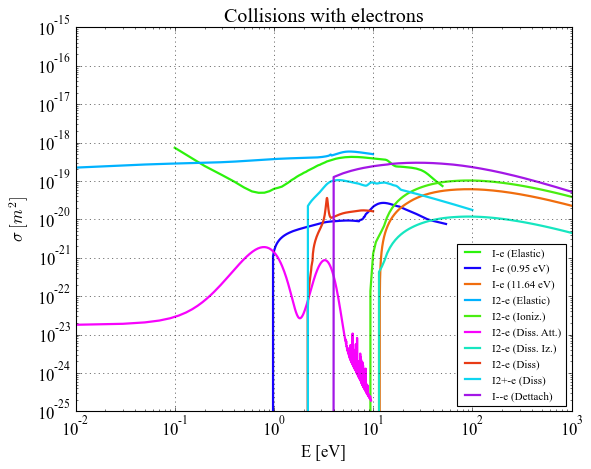

In [70]:
# Plot the data
f, ax = plt.subplots()

#ax.plot(sigma_ee_el.Energy, sigma_ee_el.Sigma)

import scipy.constants as phy_const

sigma_eI_el.plotSigma(ax)
sigma_eI_exc_1.plotSigma(ax)
sigma_eI_iz.plotSigma(ax)
sigma_eI2_el.plotSigma(ax)
sigma_eI2_iz.plotSigma(ax)
sigma_eI2_dissAt.plotSigma(ax)
sigma_eI2_dissIz.plotSigma(ax)
sigma_eI2_diss.plotSigma(ax)
sigma_eI2P_diss.plotSigma(ax)
sigma_eI2P_det.plotSigma(ax)

ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e-25, 1e-15])
ax.set_xlim([1e-2, 1000])
plt.legend(loc = 'best', fontsize = 10)
plt.title('Collisions with electrons')

ax.grid(True)

#plt.savefig("./crossSections_elec.pdf", bbox_inches='tight')

plt.show()



### Plot the average rate integrated over a Maxwellian

We compute the rate as:

$$ K = \left(\frac{m_e}{2\pi k_B T_e} \right)^{3/2} \int^\infty_0 4\pi c_e^2\sigma \exp\left(-\frac{m_e  c_e^2}{2 k_B T_e}\right) dc_{e}. $$

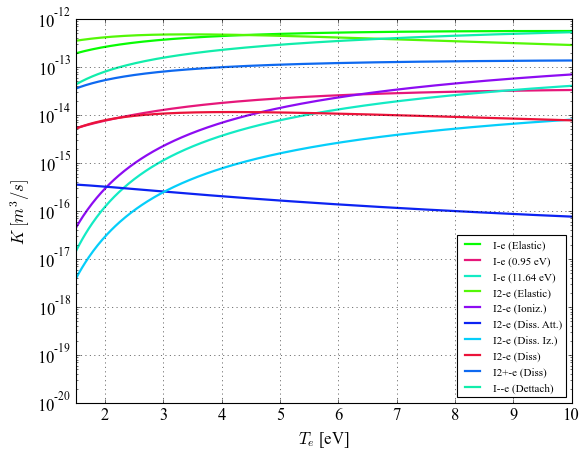

In [53]:
# Compute the rates
sigma_eI_el.computeRate()
sigma_eI_exc_1.computeRate()
sigma_eI_iz.computeRate()
sigma_eI2_el.computeRate()
sigma_eI2_iz.computeRate()
sigma_eI2_dissAt.computeRate()
sigma_eI2_dissIz.computeRate()
sigma_eI2_diss.computeRate()
sigma_eI2P_diss.computeRate()
sigma_eI2P_det.computeRate()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotRate(ax)
sigma_eI_exc_1.plotRate(ax)
sigma_eI_iz.plotRate(ax)
sigma_eI2_el.plotRate(ax)
sigma_eI2_iz.plotRate(ax)
sigma_eI2_dissAt.plotRate(ax)
sigma_eI2_dissIz.plotRate(ax)
sigma_eI2_diss.plotRate(ax)
sigma_eI2P_diss.plotRate(ax)
sigma_eI2P_det.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1.5, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)

#plt.savefig("./AverageRate_elec.pdf", bbox_inches='tight')



plt.show()

### Plot the $\Omega^{(1,1)}$

We define the integral as:

$$\Omega^{(l,r)} = \left(\frac{k_B T_e}{2\pi m_e}\right)^{1/2}\int^\infty_0 \xi^{2r+3}\exp(-\xi^2)Q^{(l)}(\xi) d\xi.$$

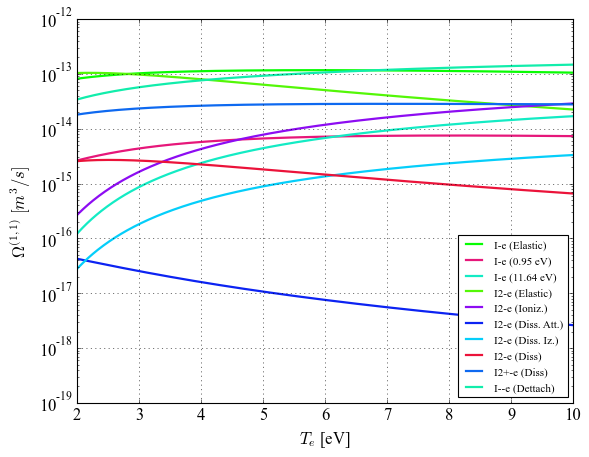

In [54]:
# Compute the rates
sigma_eI_el.computeOmega11()
sigma_eI_exc_1.computeOmega11()
sigma_eI_iz.computeOmega11()
sigma_eI2_el.computeOmega11()
sigma_eI2_iz.computeOmega11()
sigma_eI2_dissAt.computeOmega11()
sigma_eI2_dissIz.computeOmega11()
sigma_eI2_diss.computeOmega11()
sigma_eI2P_diss.computeOmega11()
sigma_eI2P_det.computeOmega11()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotOmega11(ax)
sigma_eI_exc_1.plotOmega11(ax)
sigma_eI_iz.plotOmega11(ax)
sigma_eI2_el.plotOmega11(ax)
sigma_eI2_iz.plotOmega11(ax)
sigma_eI2_dissAt.plotOmega11(ax)
sigma_eI2_dissIz.plotOmega11(ax)
sigma_eI2_diss.plotOmega11(ax)
sigma_eI2P_diss.plotOmega11(ax)
sigma_eI2P_det.plotOmega11(ax)

ax.set_ylabel(r'$\Omega^{(1,1)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()


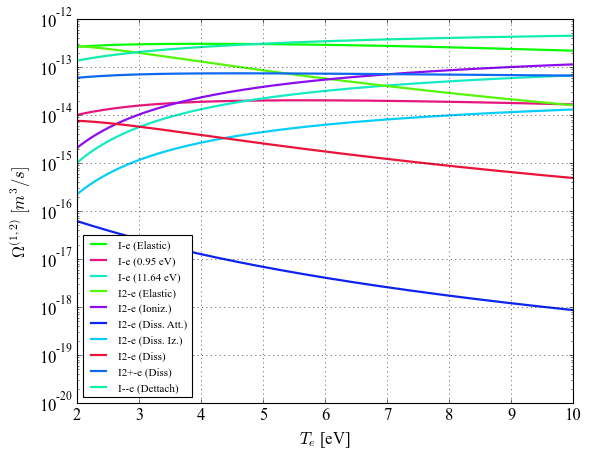

In [55]:
# Compute the rates
sigma_eI_el.computeOmega12()
sigma_eI_exc_1.computeOmega12()
sigma_eI_iz.computeOmega12()
sigma_eI2_el.computeOmega12()
sigma_eI2_iz.computeOmega12()
sigma_eI2_dissAt.computeOmega12()
sigma_eI2_dissIz.computeOmega12()
sigma_eI2_diss.computeOmega12()
sigma_eI2P_diss.computeOmega12()
sigma_eI2P_det.computeOmega12()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotOmega12(ax)
sigma_eI_exc_1.plotOmega12(ax)
sigma_eI_iz.plotOmega12(ax)
sigma_eI2_el.plotOmega12(ax)
sigma_eI2_iz.plotOmega12(ax)
sigma_eI2_dissAt.plotOmega12(ax)
sigma_eI2_dissIz.plotOmega12(ax)
sigma_eI2_diss.plotOmega12(ax)
sigma_eI2P_diss.plotOmega12(ax)
sigma_eI2P_det.plotOmega12(ax)
ax.set_ylabel(r'$\Omega^{(1,2)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega12_elec.pdf", bbox_inches='tight')



plt.show()


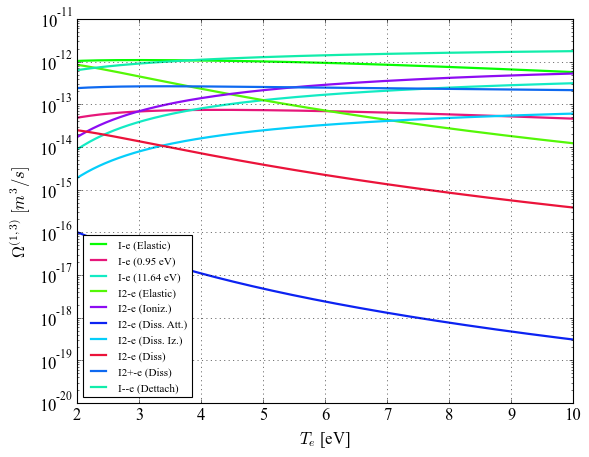

In [56]:
# Compute the rates
sigma_eI_el.computeOmega13()
sigma_eI_exc_1.computeOmega13()
sigma_eI_iz.computeOmega13()
sigma_eI2_el.computeOmega13()
sigma_eI2_iz.computeOmega13()
sigma_eI2_dissAt.computeOmega13()
sigma_eI2_dissIz.computeOmega13()
sigma_eI2_diss.computeOmega13()
sigma_eI2P_diss.computeOmega13()
sigma_eI2P_det.computeOmega13()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotOmega13(ax)
sigma_eI_exc_1.plotOmega13(ax)
sigma_eI_iz.plotOmega13(ax)
sigma_eI2_el.plotOmega13(ax)
sigma_eI2_iz.plotOmega13(ax)
sigma_eI2_dissAt.plotOmega13(ax)
sigma_eI2_dissIz.plotOmega13(ax)
sigma_eI2_diss.plotOmega13(ax)
sigma_eI2P_diss.plotOmega13(ax)
sigma_eI2P_det.plotOmega13(ax)

ax.set_ylabel(r'$\Omega^{(1,3)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()


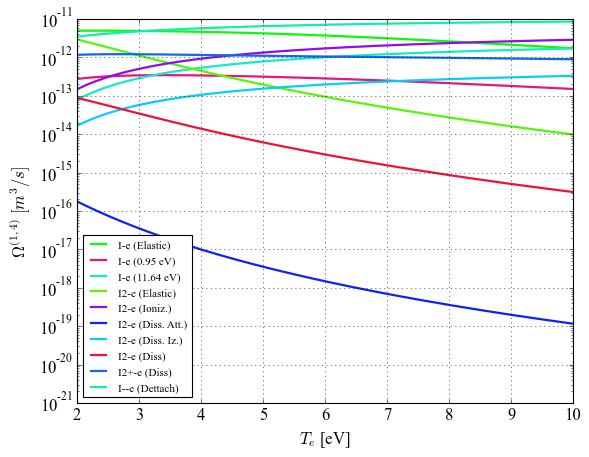

In [57]:
# Compute the rates
sigma_eI_el.computeOmega14()
sigma_eI_exc_1.computeOmega14()
sigma_eI_iz.computeOmega14()
sigma_eI2_el.computeOmega14()
sigma_eI2_iz.computeOmega14()
sigma_eI2_dissAt.computeOmega14()
sigma_eI2_dissIz.computeOmega14()
sigma_eI2_diss.computeOmega14()
sigma_eI2P_diss.computeOmega14()
sigma_eI2P_det.computeOmega14()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotOmega14(ax)
sigma_eI_exc_1.plotOmega14(ax)
sigma_eI_iz.plotOmega14(ax)
sigma_eI2_el.plotOmega14(ax)
sigma_eI2_iz.plotOmega14(ax)
sigma_eI2_dissAt.plotOmega14(ax)
sigma_eI2_dissIz.plotOmega14(ax)
sigma_eI2_diss.plotOmega14(ax)
sigma_eI2P_diss.plotOmega14(ax)
sigma_eI2P_det.plotOmega14(ax)

ax.set_ylabel(r'$\Omega^{(1,4)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()


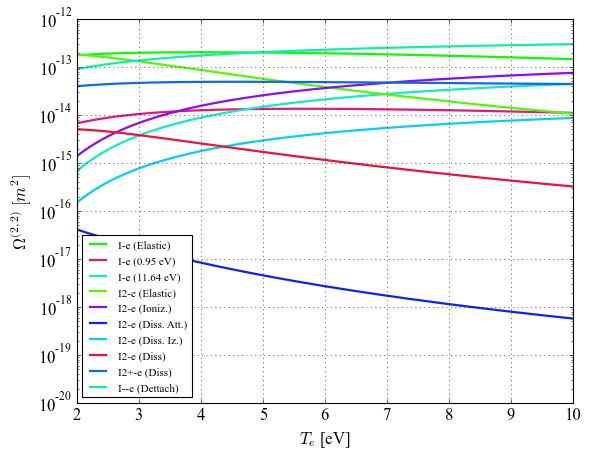

In [59]:
# Compute the rates
sigma_eI_el.computeOmega22()
sigma_eI_exc_1.computeOmega22()
sigma_eI_iz.computeOmega22()
sigma_eI2_el.computeOmega22()
sigma_eI2_iz.computeOmega22()
sigma_eI2_dissAt.computeOmega22()
sigma_eI2_dissIz.computeOmega22()
sigma_eI2_diss.computeOmega22()
sigma_eI2P_diss.computeOmega22()
sigma_eI2P_det.computeOmega22()



# Plot the data
f, ax = plt.subplots()

sigma_eI_el.plotOmega22(ax)
sigma_eI_exc_1.plotOmega22(ax)
sigma_eI_iz.plotOmega22(ax)
sigma_eI2_el.plotOmega22(ax)
sigma_eI2_iz.plotOmega22(ax)
sigma_eI2_dissAt.plotOmega22(ax)
sigma_eI2_dissIz.plotOmega22(ax)
sigma_eI2_diss.plotOmega22(ax)
sigma_eI2P_diss.plotOmega22(ax)
sigma_eI2P_det.plotOmega22(ax)

ax.set_ylabel(r'$\Omega^{(2,2)}$ $[m^{2}]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()


### Plot the fit of the rates

We approximate the rates as:

$$ K, \Omega = AT_e^{-F}\exp\left(-B/T_e + C/T_e^2 - D/T_e^3 + E/T_e^4\right)~[m^3 s^{-1}] $$


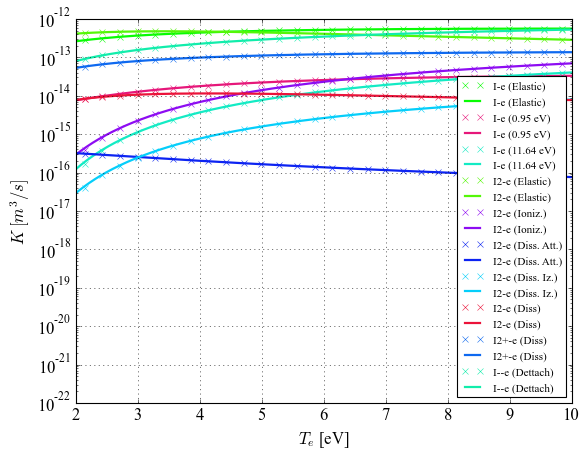

In [60]:
for coll in electronCollisions:
    coll.fitRate()

# Plot the data
f, ax = plt.subplots()

for coll in electronCollisions:
    coll.plotFitRate(ax)
    coll.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

In [61]:
for coll in electronCollisions:
    print(coll.name,"= \t", coll.Coeffs)

I-e (Elastic) = 	 [7.67085487e-12 9.11525579e+00 9.06448508e+00 4.32549310e+00
 0.00000000e+00 7.77492150e-01]
I-e (0.95 eV) = 	 [1.03206103e-12 1.46884533e+01 1.59981511e+01 7.33499496e+00
 0.00000000e+00 9.20965359e-01]
I-e (11.64 eV) = 	 [ 8.61812182e-14  1.70781384e+01  1.38037805e+01  1.53465505e+01
  0.00000000e+00 -3.61362473e-01]
I2-e (Elastic) = 	 [1.92394613e-11 7.27278667e+00 3.89346310e+00 8.94147602e-01
 0.00000000e+00 1.52699926e+00]
I2-e (Ioniz.) = 	 [ 1.38214450e-13  1.65927202e+01  1.34752657e+01  1.31375587e+01
  0.00000000e+00 -3.72565572e-01]
I2-e (Diss. Att.) = 	 [3.29609515e-15 3.02000138e+00 9.68203120e-01 1.07996326e-01
 0.00000000e+00 1.50851502e+00]
I2-e (Diss. Iz.) = 	 [ 1.59526852e-14  1.66193498e+01  1.33357810e+01  1.40619040e+01
  0.00000000e+00 -3.71570449e-01]
I2-e (Diss) = 	 [5.15477818e-13 7.43130626e+00 2.57887787e+00 5.94081124e-01
 0.00000000e+00 1.51190784e+00]
I2+-e (Diss) = 	 [5.09808287e-13 5.40715616e+00 3.63561492e+00 1.75704371e+00
 0.000000

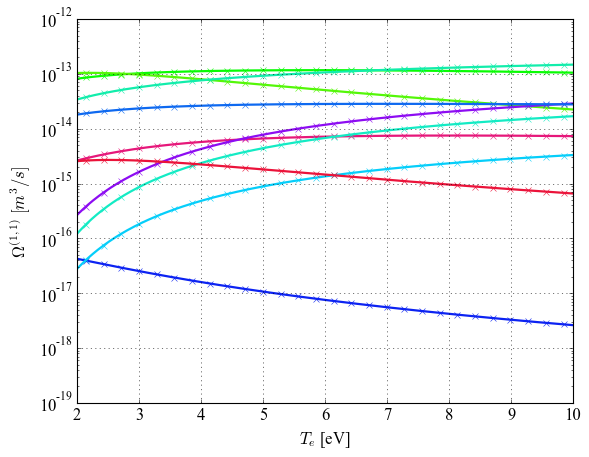

I-e (Elastic) = 	 [4.22267164e-11 2.00544395e+01 3.47094610e+01 3.58567367e+01
 1.43684780e+01 1.86982757e+00]
I-e (0.95 eV) = 	 [2.78081483e-12 2.04252702e+01 2.85085139e+01 2.58741086e+01
 1.01171116e+01 1.80498603e+00]
I-e (11.64 eV) = 	 [ 4.40167491e-14  1.48714481e+01  1.42699085e+01  2.66168199e+01
  1.87396607e+01 -1.79737335e-01]
I2-e (Elastic) = 	 [ 1.48777708e-11  7.52888676e+00  1.75198409e+00 -1.06926263e+00
 -6.08930006e-01  2.50347754e+00]
I2-e (Ioniz.) = 	 [ 6.94057261e-14  1.43852291e+01  1.33041038e+01  2.24909336e+01
  1.54510018e+01 -1.95459140e-01]
I2-e (Diss. Att.) = 	 [ 1.14106628e-15  3.31535650e+00  2.82526033e-01 -2.48096932e-01
 -4.43391202e-02  2.49611861e+00]
I2-e (Diss. Iz.) = 	 [ 8.05568868e-15  1.44625331e+01  1.37376632e+01  2.47655867e+01
  1.72440094e+01 -1.93205572e-01]
I2-e (Diss) = 	 [ 4.49264934e-13  7.76291757e+00  1.60259755e+00 -6.21610030e-01
 -4.48405287e-01  2.50403448e+00]
I2+-e (Diss) = 	 [1.79179700e-13 5.55717790e+00 5.72994108e+00 5.2445

In [63]:
for coll in electronCollisions:
    coll.fitOmega11()

# Plot the data
f, ax = plt.subplots()

for coll in electronCollisions:
    coll.plotFitOmega11(ax)
    coll.plotOmega11(ax)

ax.set_ylabel(r'$\Omega^{(1,1)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()
for coll in electronCollisions:
    print(coll.name,"= \t", coll.CoeffsOmega11[0])



In [64]:
for coll in electronCollisions:
    coll.fitOmega12()

# Plot the data
f, ax = plt.subplots()

for coll in electronCollisions:
    coll.plotFitOmega12(ax)
    coll.plotOmega12(ax)

ax.set_ylabel(r'$\Omega^{(1,2)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

for coll in electronCollisions:
    print(coll.name,"= \t", coll.CoeffsOmega12[0])


../src/CollisionalData/CrossSection.py:270: RuntimeWarning: overflow encountered in exp
  self.CoeffsOmega12 = curve_fit(lambda t,a,b,c,d,e,f: a*t**f*np.exp(-b*t+ c*t**2 - d*t**3 + e*t**4),  1./self.Temperature,  self.Omega12,  p0=(self.Omega12[-1], 0.01, 0.01, 0.01, 0.01, 0.001))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

In [65]:
for coll in electronCollisions:
    coll.fitOmega13()

# Plot the data
f, ax = plt.subplots()

for coll in electronCollisions:
    coll.plotFitOmega13(ax)
    coll.plotOmega13(ax)

ax.set_ylabel(r'$\Omega^{(1,3)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

for coll in electronCollisions:
    print(coll.name,"= \t", coll.CoeffsOmega13[0])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

In [66]:
for coll in electronCollisions:
    coll.fitOmega22()

# Plot the data
f, ax = plt.subplots()

for coll in electronCollisions:
    coll.plotFitOmega22(ax)
    coll.plotOmega22(ax)

ax.set_ylabel(r'$\Omega^{(2,2)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

for coll in electronCollisions:
    print(coll.name,"= \t", coll.CoeffsOmega22[0])

../src/CollisionalData/CrossSection.py:279: RuntimeWarning: overflow encountered in exp
  self.CoeffsOmega22 = curve_fit(lambda t,a,b,c,d,e,f: a*t**f*np.exp(-b*t+ c*t**2 - d*t**3 + e*t**4),  1./self.Temperature,  self.Omega22,  p0=(self.Omega22[-1], 0.01, 0.01, 0.01, 0.01, 0.001))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

## Ion collisions

### Plot the momentum transfer cross-sections

In [70]:
# Define the cross-section
sigma_I_ce    = CS.CrossSection(name="I-I+ (charge-exchange)", mass=phy_const.m_u*126.90447, mechanism="ion-neutral")
sigma_I_iso   = CS.CrossSection(name="I-I+ (isotropic)", mass=phy_const.m_u*126.90447, mechanism="ion-neutral")
sigma_I2_ce   = CS.CrossSection(name="I2-I2+ (charge-exchange)", mass=phy_const.m_u*126.90447*2, mechanism="ion-neutral")
sigma_I2_iso  = CS.CrossSection(name="I2-I2+ (isotropic)", mass=phy_const.m_u*126.90447*2, mechanism="ion-neutral")



# Read the data

sigma_I_ce.readData("../src/CollisionalData/CrossSections/IFullSet/I_I+_CHARGE_EXCHANGE_CROSS_SECTION.txt")
sigma_I_iso.readData("../src/CollisionalData/CrossSections/IFullSet/I_I+_ISOTROPIC_CROSS_SECTION.txt")
sigma_I2_ce.readData("../src/CollisionalData/CrossSections/IFullSet/I2_I2+_CHARGE_EXCHANGE_CROSS_SECTION.txt")
sigma_I2_iso.readData("../src/CollisionalData/CrossSections/IFullSet/I2_I2+_ISOTROPIC_CROSS_SECTION.txt")

ionCollisions= [sigma_I_ce, sigma_I_iso , sigma_I2_ce, sigma_I2_iso]


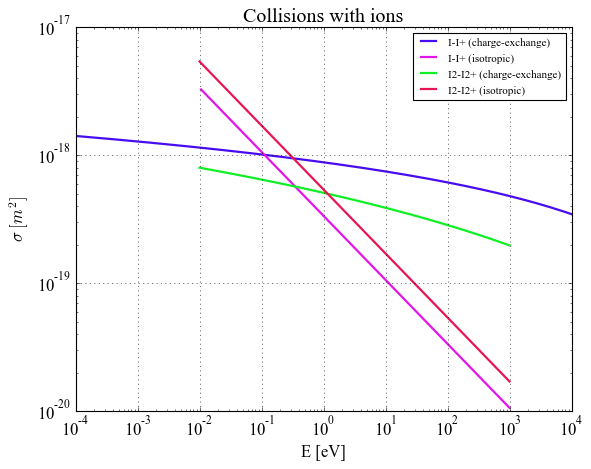

In [71]:
# Plot the data
f, ax = plt.subplots()

for coll in ionCollisions:
    coll.plotSigma(ax)

ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1e-4, 1e0])
plt.legend(loc = 'best', fontsize = 10)
plt.title("Collisions with ions")

ax.grid(True)

#plt.savefig("./crossSections_ion.pdf", bbox_inches='tight')


plt.show()


In [72]:
for coll in ionCollisions:

    coll.computeOmegaM()
    coll.computeOmegaM()
    coll.computeOmegaE()
    coll.computeOmegaE()


Computing Mach =  0.0
Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  15.0
saving the rates for  I-I+ (charge-exchange)  in  ./../src/CollisionalData/CrossSections/IFullSet/I_I+_CHARGE_EXCHANGE_CROSS_SECTION_OmegaM.pkl
reading the rates for  I-I+ (charge-exchange)  in  ./../src/CollisionalData/CrossSections/IFullSet/I_I+_CHARGE_EXCHANGE_CROSS_SECTION_OmegaM.pkl
Computing Mach =  0.0
Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  

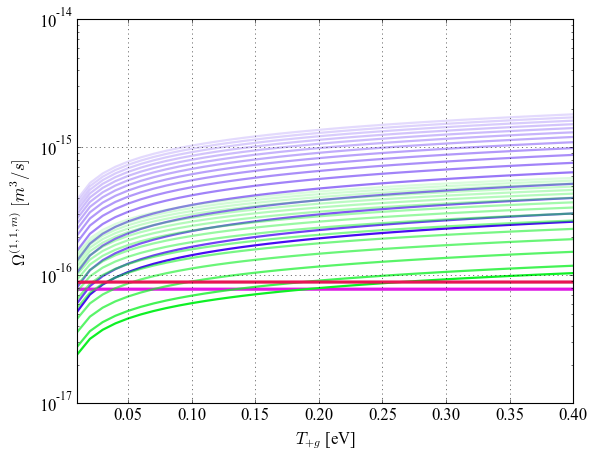

In [73]:
from matplotlib.lines import Line2D

# Plot the data
f, ax = plt.subplots()

for coll in ionCollisions:
    for iMach, Mach in enumerate(coll.Mach):
        alpha_color = 1. - (iMach/(len(coll.Mach)*1.3))**0.5
        ax.plot(coll.Temperature[:],  coll.OmegaM[iMach,:], color=coll.Color, alpha = alpha_color)

# ax.text(0.15, 2e-15, r'$M_{+g} = 15$')#, color=sigma_Xen_ce.Color, alpha = alpha_color+0.2)
# ax.text(0.25, 1.4e-16, r'$M_{+g} = 0$')#, color=sigma_Xen_ce.Color)

#custom_lines = [Line2D([0], [0], color=sigma_Xen_iso.Color, lw=2),
#                Line2D([0], [0], color=sigma_Xen_ce.Color, lw=2)]

#ax.legend(custom_lines, ['Isotropic', 'Charge-exchange'],loc = 'best', fontsize = 10)
#plt.title("Interpolation")

ax.set_ylabel(r'$\Omega^{(1,1,m)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_{+g}$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1e-2, 0.4])
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11m_ions.pdf", bbox_inches='tight')
plt.show()



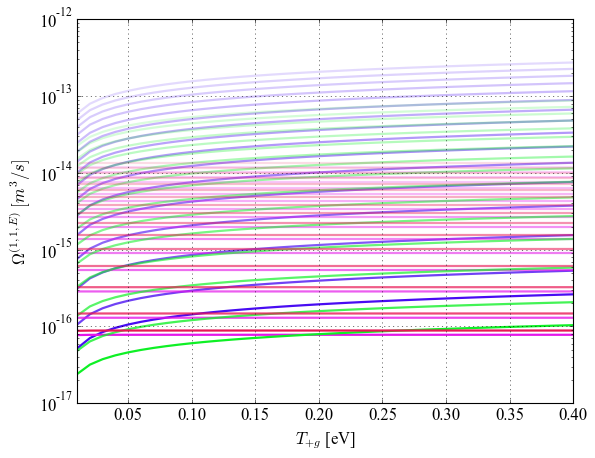

In [74]:
# Plot the data
f, ax = plt.subplots()

for coll in ionCollisions:
    for iMach, Mach in enumerate(coll.Mach):
        alpha_color = 1. - (iMach/(len(coll.Mach)*1.3))**0.5
        ax.plot(coll.Temperature[:],  coll.OmegaE[iMach,:], color=coll.Color, alpha = alpha_color)

    
#ax.text(0.15, 2e-15, r'$M_{+g} = 12$')#, color=sigma_Xen_ce.Color, alpha = alpha_color+0.2)
#ax.text(0.25, 1.4e-16, r'$M_{+g} = 0$')#, color=sigma_Xen_ce.Color)

#custom_lines = [Line2D([0], [0], color=sigma_Xen_iso.Color, lw=2),
#                Line2D([0], [0], color=sigma_Xen_ce.Color, lw=2)]

#ax.legend(custom_lines, ['Isotropic', 'Charge-exchange'],loc = 'best', fontsize = 10)
#plt.title("Interpolation")

ax.set_ylabel(r'$\Omega^{(1,1,E)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_{+g}$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1e-2, 0.4])
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11m_ions.pdf", bbox_inches='tight')
plt.show()




In [76]:
for coll in ionCollisions:
    coll.fitOmegaM()
    coll.fitOmegaE()
    print(coll.name,"= \t","Coeffs OmegaM = ",coll.CoeffsOmegaM)
    print(coll.name,"= \t","Coeffs OmegaM = ",coll.CoeffsOmegaE)


saving the coefficients for  I-I+ (charge-exchange) in  ./../src/CollisionalData/CrossSections/IFullSet/I_I+_CHARGE_EXCHANGE_CROSS_SECTION_fitOmegaM.pkl
saving the coefficients for  I-I+ (charge-exchange) in  ./../src/CollisionalData/CrossSections/IFullSet/I_I+_CHARGE_EXCHANGE_CROSS_SECTION_fitOmegaE.pkl
I-I+ (charge-exchange) = 	 Coeffs OmegaM =  [array([ 3.88728980e-16,  1.07559947e-03,  6.86175325e-06, -4.27748390e-01]), array([ 4.50075561e-16,  1.12491438e-03,  7.17858195e-06, -4.25958726e-01]), array([ 5.93234034e-16,  1.22462238e-03,  7.81954786e-06, -4.22436416e-01]), array([ 7.62880142e-16,  1.32877764e-03,  8.48960577e-06, -4.18880399e-01]), array([ 9.36245831e-16,  1.42627338e-03,  9.11727397e-06, -4.15653278e-01]), array([ 1.10706958e-15,  1.51611478e-03,  9.69601886e-06, -4.12757526e-01]), array([ 1.27378415e-15,  1.59924933e-03,  1.02318495e-05, -4.10138710e-01]), array([ 1.43613999e-15,  1.67679273e-03,  1.07318895e-05, -4.07744582e-01]), array([ 1.59428472e-15,  1.749690

saving the coefficients for  I2-I2+ (isotropic) in  ./../src/CollisionalData/CrossSections/IFullSet/I2_I2+_ISOTROPIC_CROSS_SECTION_fitOmegaM.pkl
saving the coefficients for  I2-I2+ (isotropic) in  ./../src/CollisionalData/CrossSections/IFullSet/I2_I2+_ISOTROPIC_CROSS_SECTION_fitOmegaE.pkl
I2-I2+ (isotropic) = 	 Coeffs OmegaM =  [array([ 8.85435263e-17, -1.76670419e-05, -9.34798451e-07, -4.08702087e-05]), array([ 8.85439478e-17, -8.55798684e-06, -3.93293483e-07, -2.08000676e-05]), array([ 8.85442560e-17, -8.20416137e-07, -2.87243260e-08, -2.10930404e-06]), array([ 8.85442828e-17, -1.22919380e-08, -3.43105804e-10,  1.84319510e-08]), array([8.85442831e-17, 3.82047543e-10, 3.24598018e-12, 5.43356678e-08]), array([8.85442831e-17, 5.72095761e-10, 5.19725074e-12, 5.51533609e-08]), array([8.85442831e-17, 4.84039352e-10, 4.60316912e-12, 5.47495739e-08]), array([8.85442831e-17, 5.06123415e-10, 4.61965958e-12, 5.48329976e-08]), array([8.85442831e-17, 5.41697647e-10, 5.11444854e-12, 5.48802552e-08

### Plot the rate integrated over a Maxwellian

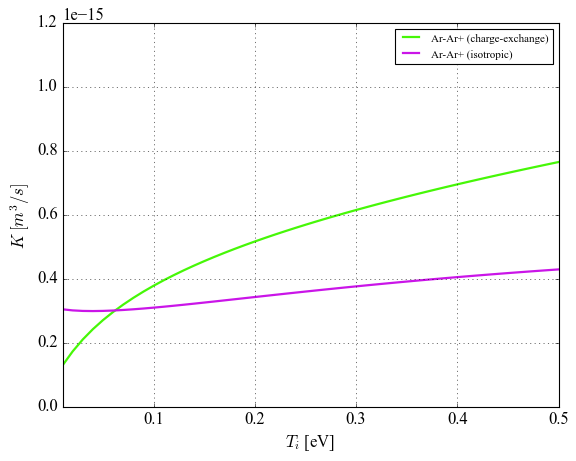

In [27]:
# Compute the rates
for coll in ionCollisions:
    coll.computeRate()

# Plot the data
f, ax = plt.subplots()

for coll in ionCollisions:
    coll.plotRate(ax)


ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_i$ [eV]')
#ax.set_yscale('log')
ax.set_xlim([1e-2, 0.5])
# ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

### Plot the fit of the rates

$$ K, \Omega = AT_e^{D}\exp\left(-B/T_e + C/T_e^2\right)~[m^3 s^{-1}] $$


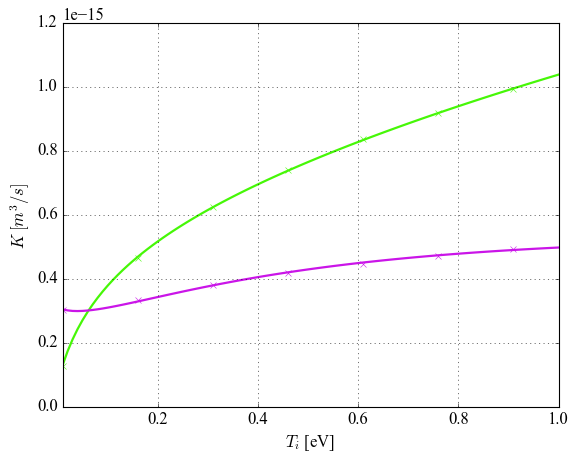

Ar-Ar+ (charge-exchange) = 	 1.0378568068345136e-15
Ar-Ar+ (isotropic) = 	 4.982291919673979e-16


In [28]:
for coll in ionCollisions:
    coll.fitRate()

sigma_Ar_ce.fitRate()
sigma_Ar_iso.fitRate()

# Plot the data
f, ax = plt.subplots()


for coll in ionCollisions:
    coll.plotFitRate(ax)
    coll.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_i$ [eV]')
#ax.set_yscale('log')
ax.set_xlim([1.e-2, 1.])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

for coll in ionCollisions:
    print(coll.name,"= \t", coll.Coeffs[0])

# Reference values

In [46]:
m_e  = phy_const.m_e
m_Arp = phy_const.m_u*39.948

pn_mTorr = 3 # mTorr
pn_Pa    = 0.13332237*pn_mTorr
Tn       = 300 # K
L        = 3e-2 #m

ne       = 1e16 # m^3
Te_eV    = 4.51 # eV
Te_K     = 4.51*phy_const.e/phy_const.Boltzmann
Ti_K     = Tn

nn       = pn_Pa/(phy_const.Boltzmann*Tn)

u_Bohm   = np.sqrt(phy_const.Boltzmann*Te_K/m_Arp)
Debye    = np.sqrt(phy_const.epsilon_0*phy_const.Boltzmann*Te_K/(phy_const.e**2*ne))

plasmaFreq = 2*np.pi*np.sqrt(abs(ne*phy_const.e**2/(m_e*phy_const.epsilon_0)))

NBCELLS   = 400
Dx        = 300/NBCELLS
TermVel_e = np.sqrt(2*phy_const.e*Te_eV/m_e)
Dt        = Dx/TermVel_e

t_0      = L/u_Bohm

print("p_gas     = ", pn_mTorr, "mTorr")
print("omega_RF  = ", 8.51999927654e7)
print("Mass_Xe   = ", phy_const.m_u*131.293, "Kg")
print("T_gas     = ", Tn, "K")
print("n_gas     = ", nn, "m^3")
print("L         = ", L, "m")
print("ne        = ", ne, "m")
print("Te        = ", Te_eV, "eV")
print("Te        = ", Te_K, "K")
print("u_Bohm    = ", u_Bohm, "m/s")
print("t_0       = ", t_0,"s")
print("Debye     = ", Debye, "m" )
print("rho_0     = ",ne*m_Arp, "kg/m3")
print("Ref Power = ",ne*phy_const.e*Te_eV*L**3/t_0, "W")
print("Ref Power = ",phy_const.e*ne*u_Bohm*Te_eV/L*L**3, "W")
print("Ref E     = ",Te_eV/L,"V/m")
print()
print()
print("Mass Ratio  = ", m_e/m_Arp)
print("L/Debye     = ", L/Debye)
print("kappa       = ", Tn/Te_K)
#print("nu_in*t0    = ", np.mean(sigma_Xen_iso.K)*nn*t_0)
print("plasma freq = ", plasmaFreq)

print()
print("Dt_plasmaWave = ", 1./plasmaFreq)
print("Dt_Thermal    = ", Dt)
print()
print("omega_RF*t0   = ", 8.51999927654e7*t_0)
print("T_RF          = ", (2*np.pi/8.51999927654e7)/t_0)

# print("Collisional Frequencies")
# print("nu_iz    = ",ionization_freq(nn,Te_eV) ,"Hz")
# print("nu_att   = ",attachment_freq(nn,Te_eV) ,"Hz")
# print("nu_rec   = ",ne*recombination_k() ,"Hz (for alpha = 1)")
# print("nu_el    = ",eI2_freq(nn,Te_eV) ,"Hz")
# print("nu_diss  = ",dissociation_freq(nn,Te_eV) ,"Hz")
# print("nu_IonI2 = ",IonI2_freq(nn) ,"Hz")
# print("nu_ee    = ",coulombCollision(ne, Te_K), "Hz")

p_gas     =  3 mTorr
omega_RF  =  85199992.7654
Mass_Xe   =  2.180171556711138e-25 Kg
T_gas     =  300 K
n_gas     =  9.65649995038565e+19 m^3
L         =  0.03 m
ne        =  1e+16 m
Te        =  4.51 eV
Te        =  52336.37672819086 K
u_Bohm    =  3300.436629780067 m/s
t_0       =  9.089706413178164e-06 s
Debye     =  0.00015787284636189524 m
rho_0     =  6.633521463253681e-10 kg/m3
Ref Power =  0.02146351486548897 W
Ref Power =  0.021463514865488975 W
Ref E     =  150.33333333333334 V/m


Mass Ratio  =  1.3732349781275802e-05
L/Debye     =  190.02634519700982
kappa       =  0.005732150728699676
plasma freq =  35446340025.94323

Dt_plasmaWave =  2.8211657374727502e-11
Dt_Thermal    =  5.954527366284279e-07

omega_RF*t0   =  774.4429206423896
T_RF          =  0.00811316772315224


In [47]:
CouloumbLog = 23 - np.log((1e+16*1e-6)**0.5*Te_eV**(-3/2))

nu_ei = 2.91e-6*1e+16*1e-6*CouloumbLog*Te_eV**(-3/2)
nu_ei*t_0

0.3796389897796944